In [ ]:
#from darts import TimeSeries
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

In [ ]:
def split_train_test(df,max_date_train,min_date_test):
  treino = df.query("Data <= @max_date_train")
  teste= df.query("Data >= @min_date_test")
  return treino,teste

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calculate_metrics(observed_values, predicted_values):
    # RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(observed_values, predicted_values))

    # MSE (Mean Squared Error)
    mse = mean_squared_error(observed_values, predicted_values)

    # MAE (Mean Absolute Error)
    mae = mean_absolute_error(observed_values, predicted_values)

    # MAPE (Mean Absolute Percentage Error)
    def mean_absolute_percentage_error(observed_values, predicted_values):
        return np.mean(np.abs((observed_values - predicted_values) / observed_values)) * 100
    mape = mean_absolute_percentage_error(observed_values, predicted_values)

    # R² (Coeficiente de Determinação)
    r2 = r2_score(observed_values, predicted_values)

    # MASE (Mean Absolute Scaled Error) - Necessário calcular os erros do modelo de benchmark
    naive_forecast = np.roll(observed_values, 1)  # Utilizando previsão ingênua (shift de 1)
    naive_errors = np.abs(observed_values - naive_forecast)
    mase = np.mean(np.abs(observed_values - predicted_values) / naive_errors)

    # sMAPE (Symmetric Mean Absolute Percentage Error)
    def symmetric_mean_absolute_percentage_error(observed_values, predicted_values):
        return np.mean(2 * np.abs(observed_values - predicted_values) / (np.abs(observed_values) + np.abs(predicted_values))) * 100
    smape = symmetric_mean_absolute_percentage_error(observed_values, predicted_values)

    return rmse, mse, mae, mape, r2, mase, smape

import psutil
memoria_usada = []
def capturar_uso_memoria():
    # Captura o uso de memória RAM atual
    uso_memoria = psutil.virtual_memory().used
    memoria_usada.append(uso_memoria)

#LSD

In [ ]:
df = pd.read_csv('https://docs.google.com/uc?export=download&id=11Wv1SFE_O0dGeYMWEXQpGOyd11Z2v41J')
df['Data'] = pd.to_datetime(df['Data'])
data = df['total_w']

In [ ]:
df["diadasemana"] = df['Data'].dt.dayofweek
df["diadomes"] = df['Data'].dt.day
df["trimestre"] = df['Data'].dt.quarter
df["mes"] = df['Data'].dt.month
df["semanadoano"] = df['Data'].dt.weekofyear
df["ano"] = df['Data'].dt.year
df["decorrido"]=((pd.to_datetime(pd.to_datetime(dt.datetime.today()).strftime("%Y-%m-%d"),format="%Y-%m-%d")-df['Data'])/timedelta(days=1)).astype(int)

<ipython-input-5-17dce3096818>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["semanadoano"] = df['Data'].dt.weekofyear


In [ ]:
train,test = split_train_test(df,'2023-07-19 23:00:00','2023-07-20 00:00:00') #split_train_test(df,'2023-01-31 23:00:00','2023-02-01 00:00:00')

In [ ]:
x_train = train
y_train = train['total_w']
x_train.drop(columns=['total_w','Data'], inplace=True)
y_train.drop(columns=['total_w','Data'], inplace=True)
x_test = test
y_test = test['total_w']
x_test.drop(columns=['total_w','Data'], inplace=True)
y_test.drop(columns=['total_w','Data'], inplace=True)

<ipython-input-7-29a7d1735650>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-7-29a7d1735650>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-7-29a7d1735650>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-7-29a7d1735650>:8: S

In [ ]:
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators=100)
reg.fit(x_train, y_train,
eval_set = [(x_train, y_train),(x_test,y_test)],
early_stopping_rounds=50,
verbose=False)
capturar_uso_memoria()

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

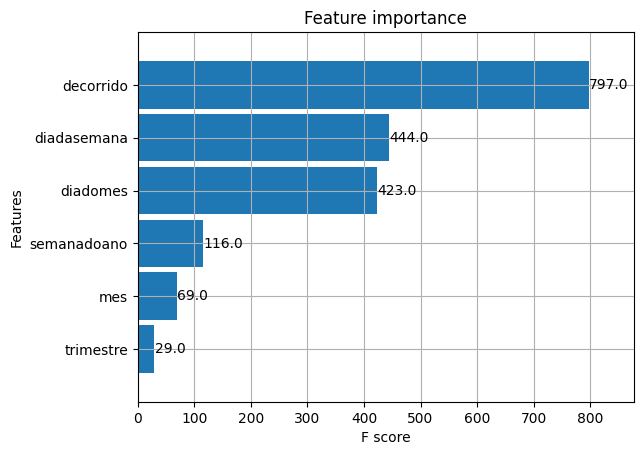

In [ ]:
xgb.plot_importance(reg,height=0.9)

In [ ]:
predict = reg.predict(x_test)

In [ ]:
rmse, mse, mae, mape, r2, mase, smape = calculate_metrics(y_test, predict)
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)
print("R²:", r2)
print("MASE:", mase)
print("sMAPE:", smape)
print("Memoria RAM:",max(memoria_usada))

RMSE: 3302.6576391827257
MSE: 10907547.481652014
MAE: 2610.483568951208
MAPE: 11.855932432382094
R²: 0.16529554331603247
MASE: inf
sMAPE: 11.96326181229843
Memoria RAM: 1007419392


# CEEI

In [ ]:
df = pd.read_csv('https://docs.google.com/uc?export=download&id=1-O64qB-YGpzpJ3QmRHTb6MxcqZYZRMdC')

df['Data'] = pd.to_datetime(df['Data'])
data = df['total_w']

In [ ]:
df["diadasemana"] = df['Data'].dt.dayofweek
df["diadomes"] = df['Data'].dt.day
df["trimestre"] = df['Data'].dt.quarter
df["mes"] = df['Data'].dt.month
df["semanadoano"] = df['Data'].dt.weekofyear
df["ano"] = df['Data'].dt.year
df["decorrido"]=((pd.to_datetime(pd.to_datetime(dt.datetime.today()).strftime("%Y-%m-%d"),format="%Y-%m-%d")-df['Data'])/timedelta(days=1)).astype(int)

<ipython-input-13-17dce3096818>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["semanadoano"] = df['Data'].dt.weekofyear


In [ ]:
train,test = split_train_test(df,'2023-07-31 23:00:00','2023-08-01 00:00:00')


In [ ]:
x_train = train
y_train = train['total_w']
x_train.drop(columns=['total_w','Data'], inplace=True)
y_train.drop(columns=['total_w','Data'], inplace=True)
x_test = test
y_test = test['total_w']
x_test.drop(columns=['total_w','Data'], inplace=True)
y_test.drop(columns=['total_w','Data'], inplace=True)

<ipython-input-15-29a7d1735650>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-15-29a7d1735650>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-15-29a7d1735650>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-15-29a7d1735650>:

In [ ]:
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators=100)
reg.fit(x_train, y_train,
eval_set = [(x_train, y_train),(x_test,y_test)],
early_stopping_rounds=50,
verbose=False)
capturar_uso_memoria()

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

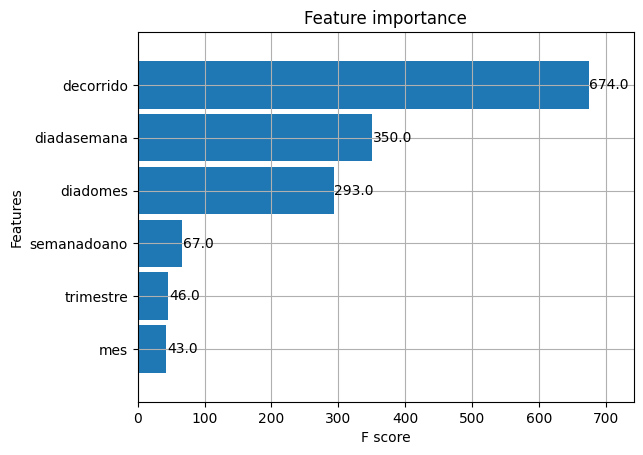

In [ ]:
xgb.plot_importance(reg,height=0.9)

In [ ]:
predict = reg.predict(x_test)

In [ ]:
rmse, mse, mae, mape, r2, mase, smape = calculate_metrics(y_test, predict)
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)
print("R²:", r2)
print("MASE:", mase)
print("sMAPE:", smape)
print("Memoria RAM:",max(memoria_usada))

RMSE: 515.2163696209982
MSE: 265447.9075254411
MAE: 464.1573809354545
MAPE: 34.6667684506066
R²: 0.02247934284939823
MASE: inf
sMAPE: 30.379456219259428
Memoria RAM: 759422976


# CN

In [ ]:
df = pd.read_csv('https://docs.google.com/uc?export=download&id=1-FpG1tqJgQJq0FVPozPvpzu-sO4n5zV3')

df['Data'] = pd.to_datetime(df['Data'])
data = df['total_w']

In [ ]:
df["diadasemana"] = df['Data'].dt.dayofweek
df["diadomes"] = df['Data'].dt.day
df["trimestre"] = df['Data'].dt.quarter
df["mes"] = df['Data'].dt.month
df["semanadoano"] = df['Data'].dt.weekofyear
df["ano"] = df['Data'].dt.year
df["decorrido"]=((pd.to_datetime(pd.to_datetime(dt.datetime.today()).strftime("%Y-%m-%d"),format="%Y-%m-%d")-df['Data'])/timedelta(days=1)).astype(int)

<ipython-input-5-17dce3096818>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["semanadoano"] = df['Data'].dt.weekofyear


In [ ]:
train,test = split_train_test(df,'2023-07-31 23:00:00','2023-08-01 00:00:00')

In [ ]:
x_train = train
y_train = train['total_w']
x_train.drop(columns=['total_w','Data'], inplace=True)
y_train.drop(columns=['total_w','Data'], inplace=True)
x_test = test
y_test = test['total_w']
x_test.drop(columns=['total_w','Data'], inplace=True)
y_test.drop(columns=['total_w','Data'], inplace=True)

<ipython-input-7-29a7d1735650>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-7-29a7d1735650>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-7-29a7d1735650>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-7-29a7d1735650>:8: S

In [ ]:
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators=100)
reg.fit(x_train, y_train,
eval_set = [(x_train, y_train),(x_test,y_test)],
early_stopping_rounds=50,
verbose=False)
capturar_uso_memoria()

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

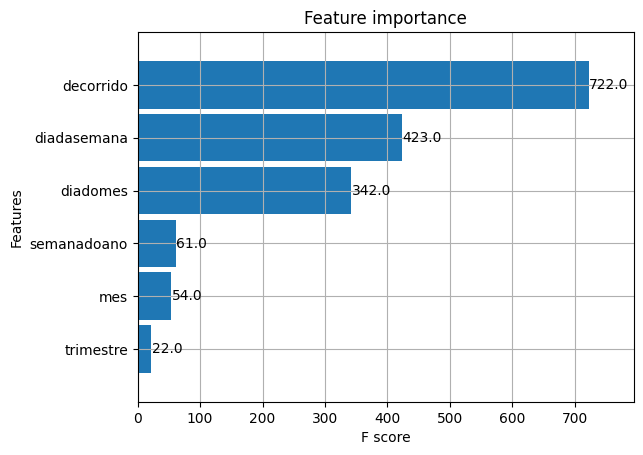

In [ ]:
xgb.plot_importance(reg,height=0.9)

In [ ]:
predict = reg.predict(x_test)

In [ ]:
rmse, mse, mae, mape, r2, mase, smape = calculate_metrics(y_test, predict)
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)
print("R²:", r2)
print("MASE:", mase)
print("sMAPE:", smape)
print("Memoria RAM:",max(memoria_usada))

RMSE: 815.6801645042185
MSE: 665334.1307656289
MAE: 645.6003627345135
MAPE: 8.415694873168826
R²: -0.011037883034289653
MASE: inf
sMAPE: 8.379300517239997
Memoria RAM: 583520256


# SPLAB

In [ ]:
df = pd.read_csv('https://docs.google.com/uc?export=download&id=1-H_5m5gkZuZd4Nx33LxOBI9cm0Rox8bR')

df['Data'] = pd.to_datetime(df['Data'])
data = df['total_w']

In [ ]:
df["diadasemana"] = df['Data'].dt.dayofweek
df["diadomes"] = df['Data'].dt.day
df["trimestre"] = df['Data'].dt.quarter
df["mes"] = df['Data'].dt.month
df["semanadoano"] = df['Data'].dt.weekofyear
df["ano"] = df['Data'].dt.year
df["decorrido"]=((pd.to_datetime(pd.to_datetime(dt.datetime.today()).strftime("%Y-%m-%d"),format="%Y-%m-%d")-df['Data'])/timedelta(days=1)).astype(int)

<ipython-input-5-17dce3096818>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["semanadoano"] = df['Data'].dt.weekofyear


In [ ]:
train,test = split_train_test(df,'2023-07-31 23:00:00','2023-08-01 00:00:00')

In [ ]:
x_train = train
y_train = train['total_w']
x_train.drop(columns=['total_w','Data'], inplace=True)
y_train.drop(columns=['total_w','Data'], inplace=True)
x_test = test
y_test = test['total_w']
x_test.drop(columns=['total_w','Data'], inplace=True)
y_test.drop(columns=['total_w','Data'], inplace=True)

<ipython-input-7-29a7d1735650>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-7-29a7d1735650>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-7-29a7d1735650>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-7-29a7d1735650>:8: S

In [ ]:
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators=100)
reg.fit(x_train, y_train,
eval_set = [(x_train, y_train),(x_test,y_test)],
early_stopping_rounds=50,
verbose=False)
capturar_uso_memoria()

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

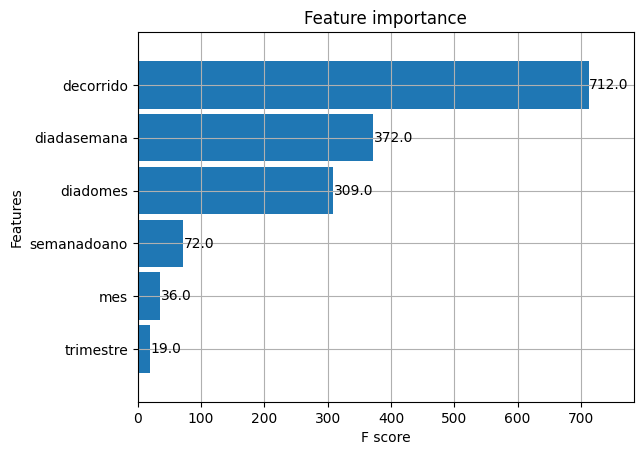

In [ ]:
xgb.plot_importance(reg,height=0.9)

In [ ]:
predict = reg.predict(x_test)

In [ ]:
rmse, mse, mae, mape, r2, mase, smape = calculate_metrics(y_test, predict)
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)
print("R²:", r2)
print("MASE:", mase)
print("sMAPE:", smape)
print("Memoria RAM:",max(memoria_usada))

RMSE: 261.7291751791674
MSE: 68502.1611399673
MAE: 212.10236977236437
MAPE: 10.52277839758683
R²: -0.012599154008802627
MASE: inf
sMAPE: 10.139146388886836
Memoria RAM: 689942528


# CTLABS

In [ ]:
df = pd.read_csv('https://docs.google.com/uc?export=download&id=1-F71fdeBhScnn01Ev78BGc-ZLGr_WHJR')

df['Data'] = pd.to_datetime(df['Data'])
data = df['total_w']

In [ ]:
df["diadasemana"] = df['Data'].dt.dayofweek
df["diadomes"] = df['Data'].dt.day
df["trimestre"] = df['Data'].dt.quarter
df["mes"] = df['Data'].dt.month
df["semanadoano"] = df['Data'].dt.weekofyear
df["ano"] = df['Data'].dt.year
df["decorrido"]=((pd.to_datetime(pd.to_datetime(dt.datetime.today()).strftime("%Y-%m-%d"),format="%Y-%m-%d")-df['Data'])/timedelta(days=1)).astype(int)

<ipython-input-5-17dce3096818>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["semanadoano"] = df['Data'].dt.weekofyear


In [ ]:
train,test = split_train_test(df,'2023-07-31 23:00:00','2023-08-01 00:00:00')

In [ ]:
x_train = train
y_train = train['total_w']
x_train.drop(columns=['total_w','Data'], inplace=True)
y_train.drop(columns=['total_w','Data'], inplace=True)
x_test = test
y_test = test['total_w']
x_test.drop(columns=['total_w','Data'], inplace=True)
y_test.drop(columns=['total_w','Data'], inplace=True)

<ipython-input-7-29a7d1735650>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-7-29a7d1735650>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-7-29a7d1735650>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop(columns=['total_w','Data'], inplace=True)
<ipython-input-7-29a7d1735650>:8: S

In [ ]:
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators=100)
reg.fit(x_train, y_train,
eval_set = [(x_train, y_train),(x_test,y_test)],
early_stopping_rounds=50,
verbose=False)
capturar_uso_memoria()

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

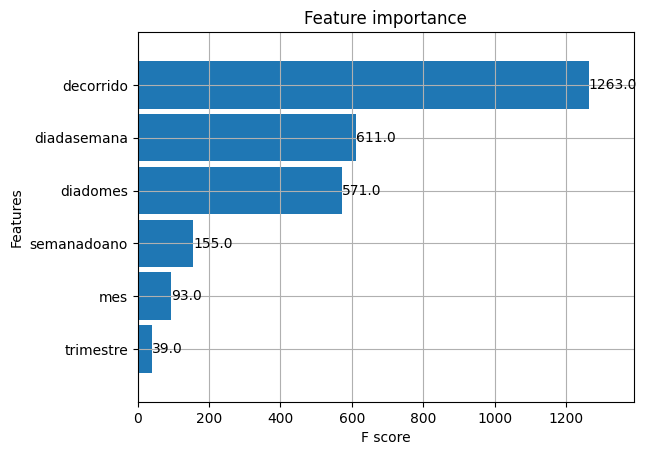

In [ ]:
xgb.plot_importance(reg,height=0.9)

In [ ]:
predict = reg.predict(x_test)

In [ ]:
rmse, mse, mae, mape, r2, mase, smape = calculate_metrics(y_test, predict)
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)
print("R²:", r2)
print("MASE:", mase)
print("sMAPE:", smape)
print("Memoria RAM:",max(memoria_usada))

RMSE: 312.59068212798815
MSE: 97712.93455324092
MAE: 241.33538214937107
MAPE: 20.811451528847407
R²: 0.028040930868122982
MASE: inf
sMAPE: 21.318074032889196
Memoria RAM: 660029440
